<a href="https://colab.research.google.com/github/saraswathibattagiri06/Spatial-Coordinate-Regression-CNN/blob/main/ML_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation (Standard in Colab, but good to show)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
def create_pixel_dataset(grid_size=50):
    """
    Creates a dataset of images with one '255' pixel.
    Returns:
        X: (2500, 50, 50, 1) float32 images
        y: (2500, 2) normalized coordinates [x, y]
    """
    X = []
    y = []

    for row in range(grid_size):
        for col in range(grid_size):
            # Create blank 50x50 image
            img = np.zeros((grid_size, grid_size), dtype=np.float32)
            img[row, col] = 255.0  # Set the target pixel

            X.append(img)
            # Coordinates are (column_index, row_index)
            # Normalize to [0, 1] by dividing by (grid_size - 1)
            y.append([col / (grid_size - 1), row / (grid_size - 1)])

    X = np.array(X).reshape(-1, grid_size, grid_size, 1)
    y = np.array(y)
    return X, y

# Generate and split (80% Train, 20% Test)
X, y = create_pixel_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset generated. Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Dataset generated. Training samples: 2000, Testing samples: 500


In [3]:
def build_coordinate_regressor():
    model = models.Sequential([
        # Feature Extraction
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),

        # Regression Head
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='sigmoid') # Sigmoid ensures output is [0, 1]
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_coordinate_regressor()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,992,258 (15.23 MB)

 Trainable params: 3,992,258 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0521 - mae: 0.1744 - val_loss: 0.0044 - val_mae: 0.0511
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0040 - mae: 0.0492 - val_loss: 0.0020 - val_mae: 0.0348
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0014 - mae: 0.0291 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 9.6889e-04 - mae: 0.0236 - val_loss: 9.1080e-04 - val_mae: 0.0232
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 6.4245e-04 - mae: 0.0195 - val_loss: 7.8435e-04 - val_mae: 0.0213
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 8.4616e-04 - mae: 0.0221 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0024 - val_mae: 0.0399
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0013 - mae: 0.0272 - val_loss: 0.0012 - val_mae: 0.0276
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━

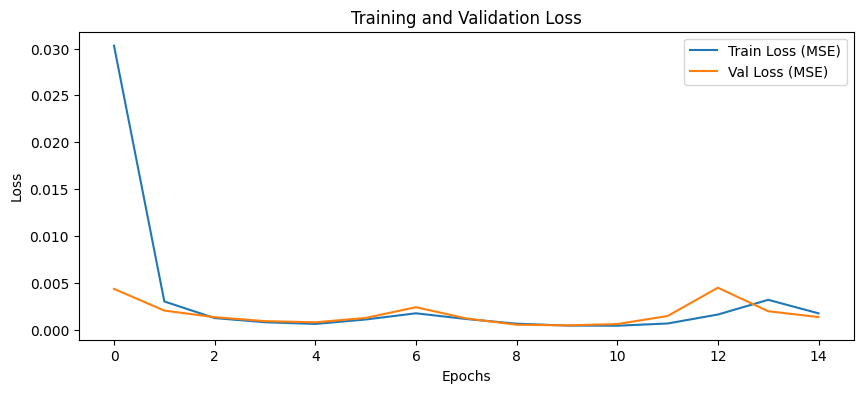

In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Graphing the Training Logs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


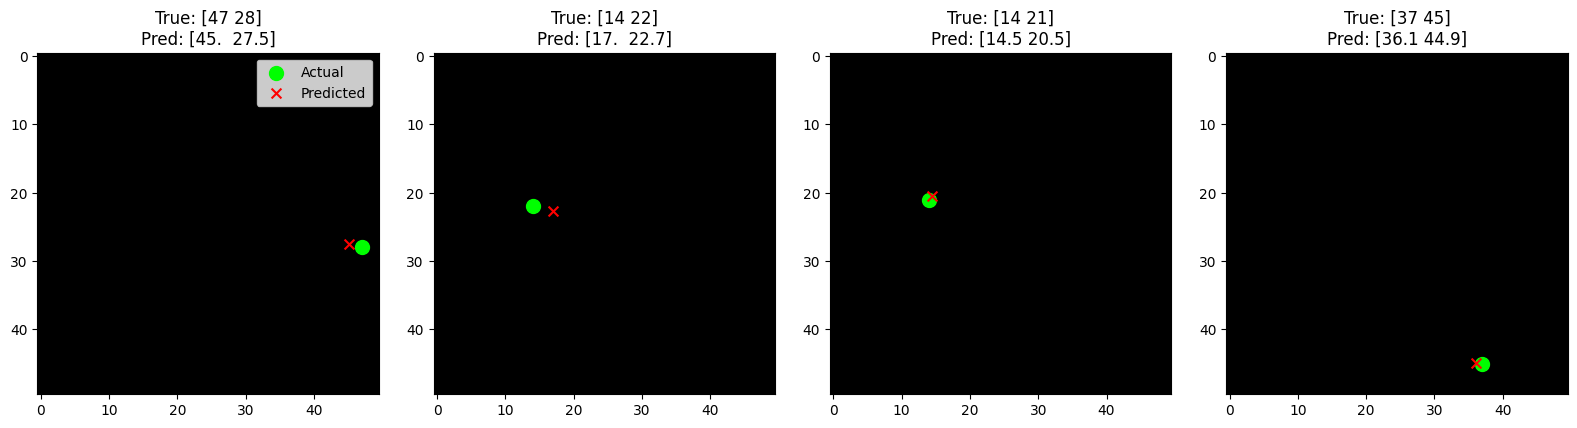

In [5]:
def visualize_predictions(model, X_samples, y_true_norm):
    predictions_norm = model.predict(X_samples)

    # Denormalize for plotting (scale back to 0-49)
    y_true = y_true_norm * 49
    y_pred = predictions_norm * 49

    plt.figure(figsize=(16, 4))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(X_samples[i].reshape(50, 50), cmap='gray')

        # Plot markers
        plt.scatter(y_true[i][0], y_true[i][1], color='lime', s=100, label='Actual', marker='o')
        plt.scatter(y_pred[i][0], y_pred[i][1], color='red', s=50, label='Predicted', marker='x')

        plt.title(f"True: {y_true[i].astype(int)}\nPred: {y_pred[i].round(1)}")
        if i == 0: plt.legend()
    plt.tight_layout()
    plt.show()

visualize_predictions(model, X_test[:4], y_test[:4])